In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
import folium
import json

In [2]:
#Importing data

path = r'/Users/alejandroguillen/Documents/Airbnb'

In [3]:
df_airb = pd.read_csv(os.path.join(path,'Data','Prepared','small_listing.csv'), index_col=False)

In [4]:
df_airb.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,price,availability_365
0,5121.0,7356,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,60,0
1,2595.0,2845,Manhattan,Midtown,40.75356,-73.98559,240,325
2,14991.0,59023,Manhattan,Lower East Side,40.72207,-73.98976,120,268
3,5136.0,7378,Brooklyn,Sunset Park,40.66265,-73.99454,276,275
4,59709.0,186084,Manhattan,Chinatown,40.71780,-73.99320,325,38


<Axes: xlabel='price', ylabel='Count'>

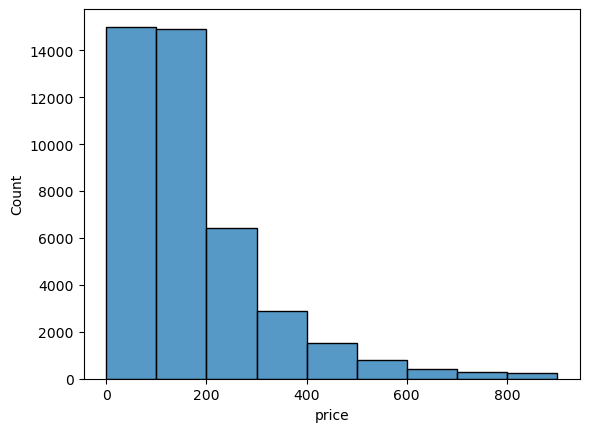

In [5]:
# Create a histogram of the price column to check for extreme values

sns.histplot(df_airb['price'], bins=range(0, 1000, 100))

<Axes: xlabel='availability_365', ylabel='Count'>

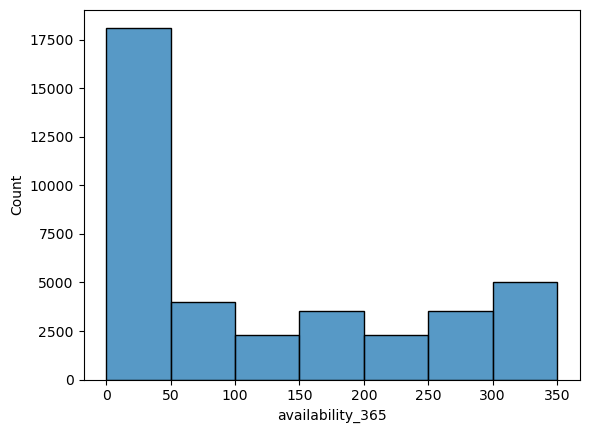

In [6]:
# Check for extreme values in availability_365

sns.histplot(df_airb['availability_365'], bins=range(0, 400, 50))

/var/folders/9m/8nqk2r316sbdm8n2bttyp65c0000gn/T/ipykernel_46687/791656560.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_airb['availability_365'], bins=10) # Shows extreme values


<Axes: xlabel='availability_365', ylabel='Density'>

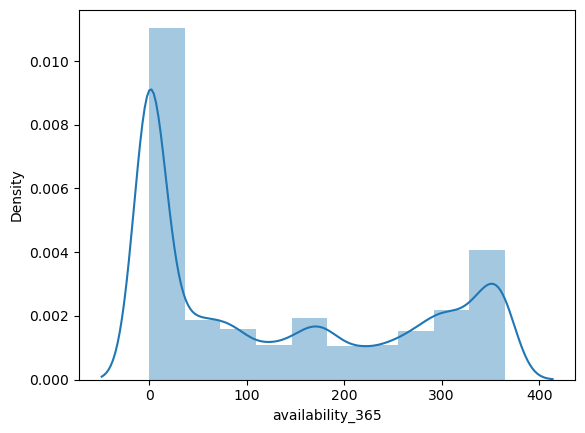

In [7]:
# Checking for extreme values
sns.distplot(df_airb['availability_365'], bins=10) # Shows extreme values

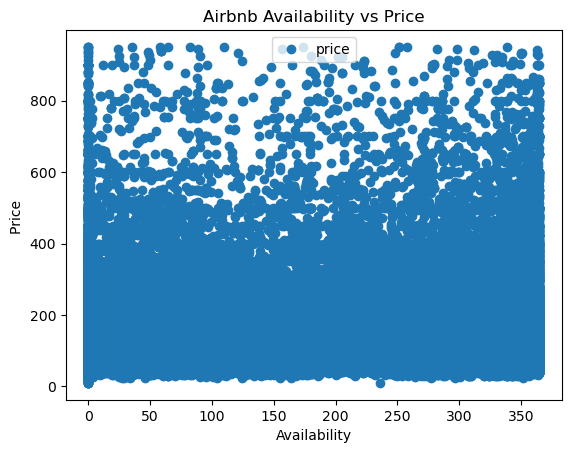

In [8]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_airb.plot(x = 'availability_365', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Airbnb Availability vs Price')  
plt.xlabel('Availability')  
plt.ylabel('Price ')  
plt.show()

In [9]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_airb['availability_365'].values.reshape(-1,1)
y = df_airb['price'].values.reshape(-1,1)

In [10]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [12]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [13]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

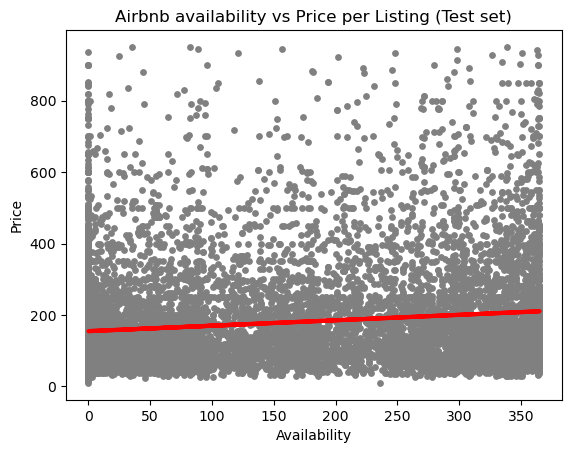

In [14]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Airbnb availability vs Price per Listing (Test set)')
plot_test.xlabel('Availability')
plot_test.ylabel('Price')
plot_test.show()

In [15]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [16]:
#Creating a subset with only numeric data

df_airb = df_airb.drop(columns=['id','neighbourhood_group','neighbourhood', 'latitude','longitude'], axis=1)

In [17]:
score = [kmeans[i].fit(df_airb).score(df_airb) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/alejandroguillen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alejandroguillen/anaconda3/lib/python3.10/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
/Users/alejandroguillen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fro

[-1.1487713323953333e+21,
 -2.096814654221274e+20,
 -8.200635450619154e+19,
 -4.4960658372994154e+19,
 -2.97857629245311e+19,
 -2.032694139586279e+19,
 -1.4335404516727615e+19,
 -1.1247010909917422e+19,
 -8.482185776755762e+18]

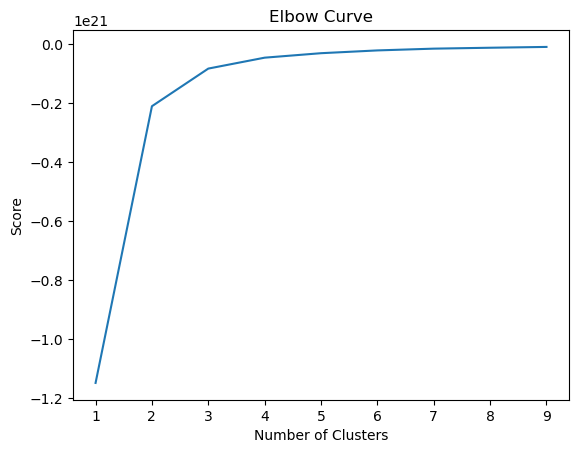

In [18]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [19]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [20]:
# Fit the k-means object to the data.

kmeans.fit(df_airb)

/Users/alejandroguillen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [21]:
df_airb['clusters'] = kmeans.fit_predict(df_airb)

/Users/alejandroguillen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


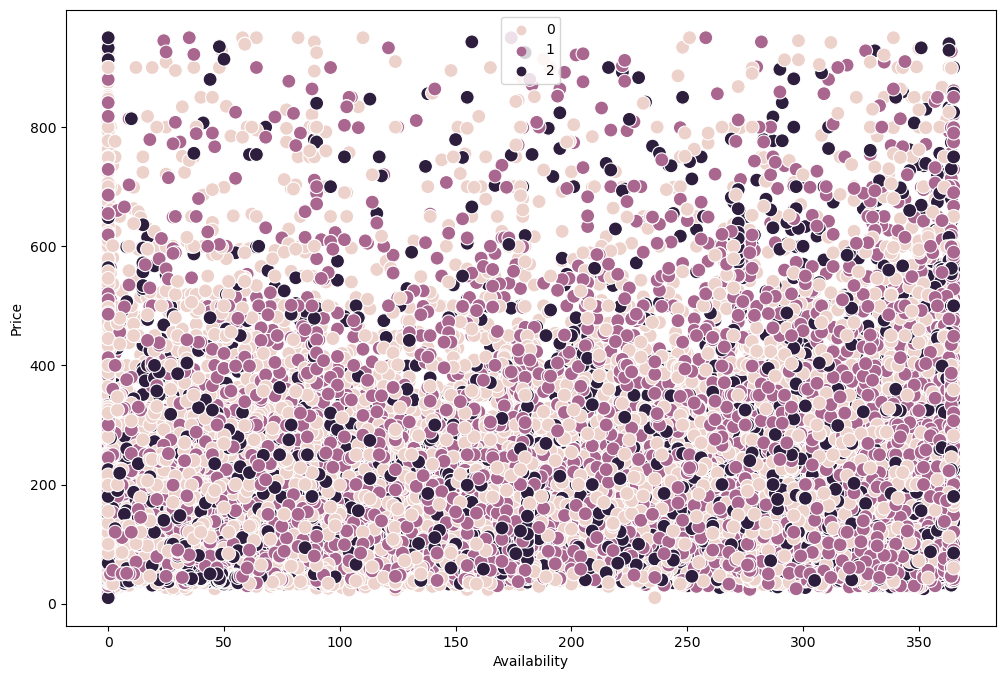

In [23]:
# Plot the clusters 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_airb['availability_365'], y=df_airb['price'], hue=kmeans.labels_, s=100) 


ax.grid(False) # This removes the grid from the background.
plt.xlabel('Availability') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()